In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import numpy as np
import scipy as sp
import sklearn as sk
import cartopy as cp
import xarray as xr
import pandas as pd
import cftime
import dateutil
import dask
#Use the 2 lines below if the notebook has a dark theme (to make labelling visible):
from jupyterthemes import jtplot
jtplot.style(theme='grade3', context='notebook', ticks=True, grid=False)
import matplotlib.pyplot as plt
#The following code resets the default plot size so you don't have to fiddle with figsize every time"
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

In [3]:
#Need the following line to avoid hdf5 issues that prevent opening thee file
# https://stackoverflow.com/questions/49317927/errno-101-netcdf-hdf-error-when-opening-netcdf-file
%env HDF5_USE_FILE_LOCKING=FALSE

env: HDF5_USE_FILE_LOCKING=FALSE


In [4]:
def covariance(x, y, dims=None):
    return xr.dot(x - x.mean(dims), y - y.mean(dims), dims=dims) / x.count(dims)

def correlation(x, y, dims=None):
    return covariance(x, y, dims) / (x.std(dims) * y.std(dims))

# Load and Manipulate Data

In [5]:
#Load AIRI data 
from netCDF4 import Dataset
from datetime import datetime, timedelta
from netCDF4 import num2date, date2num
dataset_file = "pALLIN.nc"
airi_dat = xr.open_dataset(dataset_file, decode_times=False)
units, reference_date = airi_dat.time.attrs['units'].split('since')
airi_dat['time'] = pd.date_range(start=reference_date, periods=airi_dat.sizes['time'], freq='MS')
#This file's calendar isn't recognized when using xr.open_dataset. The above workaround is from: 
#https://stackoverflow.com/questions/55648630/how-to-decode-the-time-variable-while-using-xarray-to-load-a-netcdf-file
# "M" means "month end frequency" (see https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases)

In [6]:
precip = airi_dat['precip']

In [7]:
#Load SST data
dataset_url = "https://psl.noaa.gov/thredds/dodsC/Datasets/noaa.ersst.v5/sst.mnmean.nc"
sst_dat = xr.open_dataset(dataset_url)
sst = sst_dat['sst']

In [8]:
#Slice SST data to the same duration as precip and calculate monthly anomalies
sst_subset = sst.sel(time=slice('1871-01-30','2017-01-01'))
sst_clim = sst_subset.groupby('time.month').mean('time')
sst_anomfull = sst_subset.groupby("time.month")-sst_clim
sst_anomfull

/global/home/users/medhap02/.conda/envs/xarrayenv2/lib/python3.7/site-packages/xarray/core/nanops.py:160: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.DataArray 'sst' (time: 1752, lat: 89, lon: 180)>
array([[[1.788139e-06, 1.788139e-06, ..., 1.788139e-06, 1.788139e-06],
        [1.788139e-06, 1.788139e-06, ..., 1.788139e-06, 1.788139e-06],
        ...,
        [         nan,          nan, ...,          nan,          nan],
        [         nan,          nan, ...,          nan,          nan]],

       [[1.788139e-06, 1.788139e-06, ..., 1.788139e-06, 1.788139e-06],
        [1.788139e-06, 1.788139e-06, ..., 1.788139e-06, 1.788139e-06],
        ...,
        [         nan,          nan, ...,          nan,          nan],
        [         nan,          nan, ...,          nan,          nan]],

       ...,

       [[3.152323e-02, 2.609873e-02, ..., 2.140296e-02, 3.102016e-02],
        [2.697122e-02, 1.542413e-02, ..., 1.046002e-02, 2.427316e-02],
        ...,
        [         nan,          nan, ...,          nan,          nan],
        [         nan,          nan, ...,          nan,          nan]],

       [[1.788139e-06, 1.788139e-

In [9]:
sst_subset1 = sst.sel(time=slice('1900-01-01','1901-12-31'))
sst_subset2 = sst.sel(time=slice('1903-01-01','1906-12-31'))
sst_subset3 = sst.sel(time=slice('1908-01-01','1911-12-31'))
sst_subset4 = sst.sel(time=slice('1913-01-01','1913-12-31'))
sst_subset5 = sst.sel(time=slice('1915-01-01','1918-12-31'))
sst_subset6 = sst.sel(time=slice('1920-01-01','1921-12-31'))
sst_subset7 = sst.sel(time=slice('1923-01-01','1927-12-31'))
sst_subset8 = sst.sel(time=slice('1929-01-01','1931-12-31'))
sst_subset9 = sst.sel(time=slice('1934-01-01','1939-12-31'))
sst_subset10 = sst.sel(time=slice('1941-01-01','1948-12-31'))
sst_subset11 = sst.sel(time=slice('1951-01-01','1955-12-31'))
sst_subset12 = sst.sel(time=slice('1957-01-01','1958-12-31'))
sst_subset13 = sst.sel(time=slice('1960-01-01','1962-12-31'))
sst_subset13 = sst.sel(time=slice('1964-01-01','1965-12-31'))
sst_subset14 = sst.sel(time=slice('1967-01-01','1971-12-31'))
sst_subset15 = sst.sel(time=slice('1973-01-01','1976-12-31'))
sst_subset16 = sst.sel(time=slice('1978-01-01','1979-12-31'))
sst_subset17 = sst.sel(time=slice('1981-01-01','1982-12-31'))
sst_subset18 = sst.sel(time=slice('1984-01-01','1991-12-31'))
sst_subset19 = sst.sel(time=slice('1993-01-01','1998-12-31'))
sst_subset20 = sst.sel(time=slice('2000-01-01','2002-12-31'))
sst_subset21 = sst.sel(time=slice('2004-01-01','2006-12-31'))
sst_subset22 = sst.sel(time=slice('2008-01-01','2010-12-31'))
sst_subset23 = sst.sel(time=slice('2012-01-01','2015-12-31'))

sst_anomtemp = xr.merge([sst_subset1, sst_subset2, sst_subset3, sst_subset4, sst_subset5, 
                   sst_subset6, sst_subset7, sst_subset8, sst_subset9, sst_subset10, 
                   sst_subset11, sst_subset12, sst_subset13, sst_subset14, sst_subset15, 
                   sst_subset16, sst_subset17, sst_subset18, sst_subset19, sst_subset20, 
                   sst_subset21, sst_subset22, sst_subset23])
#sst_anom = xr.Dataset.to_array(sst_anomtemp).drop('variable')
print(sst_anomtemp)
sst_anom = sst_anomtemp['sst']
#1902, 1907, 1912, 1914, 1919, 1922, 1928, 1932, 1933, 1940
#1949, 1950, 1956, 1959, 1963, 1966, 1972, 1977, 1980, 1983
#1992, 1999, 2003, 2007, 2011

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 1056)
Coordinates:
  * time     (time) datetime64[ns] 1900-01-01 1900-02-01 ... 2015-12-01
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
Data variables:
    sst      (time, lat, lon) float32 -1.8 -1.8 -1.8 -1.8 ... nan nan nan nan


In [10]:
#Load SLP data
dataset_url = "/global/scratch/medhap02/ISMData/prmsl.mon.mean.nc"
slp_dat = xr.open_dataset(dataset_url)
slp = slp_dat['prmsl']

In [11]:
#Slice SLP data to the same duration as precip and calculate monthly anomalies
slp_subset = slp.sel(time=slice('1871-01-01','2015-12-31'))
slp_clim = slp_subset.groupby('time.month').mean('time')
slp_anomfull = slp_subset.groupby("time.month")-slp_clim
slp_anomfull

<xarray.DataArray 'prmsl' (time: 1740, lat: 181, lon: 360)>
array([[[  114.765625,   114.765625, ...,   114.765625,   114.765625],
        [   94.78125 ,    94.46875 , ...,    95.359375,    95.03125 ],
        ...,
        [  293.65625 ,   293.95312 , ...,   293.20312 ,   293.4297  ],
        [  288.66406 ,   288.66406 , ...,   288.66406 ,   288.66406 ]],

       [[   75.84375 ,    75.84375 , ...,    75.84375 ,    75.84375 ],
        [   67.66406 ,    68.02344 , ...,    66.85156 ,    67.24219 ],
        ...,
        [  587.2969  ,   587.52344 , ...,   586.9219  ,   587.0781  ],
        [  581.14844 ,   581.14844 , ...,   581.14844 ,   581.14844 ]],

       ...,

       [[ -876.5703  ,  -876.5703  , ...,  -876.5703  ,  -876.5703  ],
        [ -937.10156 ,  -936.8594  , ...,  -937.625   ,  -937.3906  ],
        ...,
        [-1008.4375  , -1008.8906  , ..., -1007.5625  , -1007.9922  ],
        [-1047.0938  , -1047.0938  , ..., -1047.0938  , -1047.0938  ]],

       [[ -525.5     ,  -525.5

In [12]:
slp_subset1 = slp.sel(time=slice('1900-01-01','1901-12-31'))
slp_subset2 = slp.sel(time=slice('1903-01-01','1906-12-31'))
slp_subset3 = slp.sel(time=slice('1908-01-01','1911-12-31'))
slp_subset4 = slp.sel(time=slice('1913-01-01','1913-12-31'))
slp_subset5 = slp.sel(time=slice('1915-01-01','1918-12-31'))
slp_subset6 = slp.sel(time=slice('1920-01-01','1921-12-31'))
slp_subset7 = slp.sel(time=slice('1923-01-01','1927-12-31'))
slp_subset8 = slp.sel(time=slice('1929-01-01','1931-12-31'))
slp_subset9 = slp.sel(time=slice('1934-01-01','1939-12-31'))
slp_subset10 = slp.sel(time=slice('1941-01-01','1948-12-31'))
slp_subset11 = slp.sel(time=slice('1951-01-01','1955-12-31'))
slp_subset12 = slp.sel(time=slice('1957-01-01','1958-12-31'))
slp_subset13 = slp.sel(time=slice('1960-01-01','1962-12-31'))
slp_subset13 = slp.sel(time=slice('1964-01-01','1965-12-31'))
slp_subset14 = slp.sel(time=slice('1967-01-01','1971-12-31'))
slp_subset15 = slp.sel(time=slice('1973-01-01','1976-12-31'))
slp_subset16 = slp.sel(time=slice('1978-01-01','1979-12-31'))
slp_subset17 = slp.sel(time=slice('1981-01-01','1982-12-31'))
slp_subset18 = slp.sel(time=slice('1984-01-01','1991-12-31'))
slp_subset19 = slp.sel(time=slice('1993-01-01','1998-12-31'))
slp_subset20 = slp.sel(time=slice('2000-01-01','2002-12-31'))
slp_subset21 = slp.sel(time=slice('2004-01-01','2006-12-31'))
slp_subset22 = slp.sel(time=slice('2008-01-01','2010-12-31'))
slp_subset23 = slp.sel(time=slice('2012-01-01','2015-12-31'))

slp_anomtemp = xr.merge([slp_subset1, slp_subset2, slp_subset3, slp_subset4, slp_subset5, 
                   slp_subset6, slp_subset7, slp_subset8, slp_subset9, slp_subset10, 
                   slp_subset11, slp_subset12, slp_subset13, slp_subset14, slp_subset15, 
                   slp_subset16, slp_subset17, slp_subset18, slp_subset19, slp_subset20, 
                   slp_subset21, slp_subset22, slp_subset23])
#slp_anom = xr.Dataset.to_array(slp_anomtemp).drop('variable')
print(slp_anomtemp)
slp_anom = slp_anomtemp['prmsl']
#1902, 1907, 1912, 1914, 1919, 1922, 1928, 1932, 1933, 1940
#1949, 1950, 1956, 1959, 1963, 1966, 1972, 1977, 1980, 1983
#1992, 1999, 2003, 2007, 2011

<xarray.Dataset>
Dimensions:  (lat: 181, lon: 360, time: 1056)
Coordinates:
  * time     (time) datetime64[ns] 1900-01-01 1900-02-01 ... 2015-12-01
  * lat      (lat) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    prmsl    (time, lat, lon) float32 100621.44 100621.44 ... 101141.016


In [13]:
#Load MSE data
dataset_url = "MSE_20thcentury.nc"
mse_dat1 = xr.open_dataset('/global/scratch/medhap02/ISMData/MSE_20thcentury.nc')
mse_dat = mse_dat1.rename({'LON':'lon', 'LAT':'lat','TIME':'time'})
mse = mse_dat['MSE']
print(mse_dat)

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 181, lon: 360, time: 2160)
Coordinates:
  * lon        (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat        (lat) float64 -90.0 -89.0 -88.0 -87.0 ... 87.0 88.0 89.0 90.0
  * time       (time) datetime64[ns] 1836-01-01 1836-02-01 ... 2015-12-01
Dimensions without coordinates: bnds
Data variables:
    TIME_bnds  (time, bnds) datetime64[ns] ...
    MSE        (time, lat, lon) float64 ...
    DMSEDT     (time, lat, lon) float64 ...
Attributes:
    history:      PyFerret V7.43 (optimized) 14-May-20
    Conventions:  CF-1.6


In [14]:
#Slice MSE data to the same duration as precip and calculate monthly anomalies
mse_subset = mse.sel(time=slice('1871-01-30','2017-01-01'))
mse_clim = mse_subset.groupby('time.month').mean('time')
mse_anomfull = mse_subset.groupby("time.month")-mse_clim
mse_anomfull

<xarray.DataArray 'MSE' (time: 1739, lat: 181, lon: 360)>
array([[[ -437.976186,  -437.976186, ...,  -437.976186,  -437.976186],
        [ -357.903304,  -357.881208, ...,  -348.426553,  -351.846723],
        ...,
        [-4136.464814, -4142.140899, ..., -4125.058225, -4129.258011],
        [-3946.385781, -3946.385781, ..., -3946.385781, -3946.385781]],

       [[ -685.706864,  -685.706864, ...,  -685.706864,  -685.706864],
        [ -523.262003,  -522.176401, ...,  -528.206152,  -525.088336],
        ...,
        [-2774.219152, -2771.776149, ..., -2769.221152, -2770.293549],
        [-2662.830975, -2662.830975, ..., -2662.830975, -2662.830975]],

       ...,

       [[ 2257.7285  ,  2257.7285  , ...,  2257.7285  ,  2257.7285  ],
        [ 2691.46434 ,  2695.995047, ...,  2682.928563,  2688.836707],
        ...,
        [ 3071.988646,  3092.121979, ...,  3027.33813 ,  3049.99822 ],
        [ 3156.791382,  3156.791382, ...,  3156.791382,  3156.791382]],

       [[  864.856915,   864.856

In [15]:
mse_subset1 = mse.sel(time=slice('1900-01-01','1901-12-31'))
mse_subset2 = mse.sel(time=slice('1903-01-01','1906-12-31'))
mse_subset3 = mse.sel(time=slice('1908-01-01','1911-12-31'))
mse_subset4 = mse.sel(time=slice('1913-01-01','1913-12-31'))
mse_subset5 = mse.sel(time=slice('1915-01-01','1918-12-31'))
mse_subset6 = mse.sel(time=slice('1920-01-01','1921-12-31'))
mse_subset7 = mse.sel(time=slice('1923-01-01','1927-12-31'))
mse_subset8 = mse.sel(time=slice('1929-01-01','1931-12-31'))
mse_subset9 = mse.sel(time=slice('1934-01-01','1939-12-31'))
mse_subset10 = mse.sel(time=slice('1941-01-01','1948-12-31'))
mse_subset11 = mse.sel(time=slice('1951-01-01','1955-12-31'))
mse_subset12 = mse.sel(time=slice('1957-01-01','1958-12-31'))
mse_subset13 = mse.sel(time=slice('1960-01-01','1962-12-31'))
mse_subset13 = mse.sel(time=slice('1964-01-01','1965-12-31'))
mse_subset14 = mse.sel(time=slice('1967-01-01','1971-12-31'))
mse_subset15 = mse.sel(time=slice('1973-01-01','1976-12-31'))
mse_subset16 = mse.sel(time=slice('1978-01-01','1979-12-31'))
mse_subset17 = mse.sel(time=slice('1981-01-01','1982-12-31'))
mse_subset18 = mse.sel(time=slice('1984-01-01','1991-12-31'))
mse_subset19 = mse.sel(time=slice('1993-01-01','1998-12-31'))
mse_subset20 = mse.sel(time=slice('2000-01-01','2002-12-31'))
mse_subset21 = mse.sel(time=slice('2004-01-01','2006-12-31'))
mse_subset22 = mse.sel(time=slice('2008-01-01','2010-12-31'))
mse_subset23 = mse.sel(time=slice('2012-01-01','2015-12-31'))

mse_anomtemp = xr.merge([mse_subset1, mse_subset2, mse_subset3, mse_subset4, mse_subset5, 
                   mse_subset6, mse_subset7, mse_subset8, mse_subset9, mse_subset10, 
                   mse_subset11, mse_subset12, mse_subset13, mse_subset14, mse_subset15, 
                   mse_subset16, mse_subset17, mse_subset18, mse_subset19, mse_subset20, 
                   mse_subset21, mse_subset22, mse_subset23])
#mse_anom = xr.Dataset.to_array(mse_anomtemp).drop('variable')
print(mse_anomtemp)
mse_anom = mse_anomtemp['MSE']
#1902, 1907, 1912, 1914, 1919, 1922, 1928, 1932, 1933, 1940
#1949, 1950, 1956, 1959, 1963, 1966, 1972, 1977, 1980, 1983
#1992, 1999, 2003, 2007, 2011

<xarray.Dataset>
Dimensions:  (lat: 181, lon: 360, time: 1056)
Coordinates:
  * time     (time) datetime64[ns] 1900-01-01 1900-02-01 ... 2015-12-01
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
Data variables:
    MSE      (time, lat, lon) float64 2.491e+05 2.491e+05 ... 2.498e+05


In [16]:
#Get precip anomalies
precip_clim = precip.groupby("time.month").mean("time")
precip_anomfull = precip.groupby("time.month") - precip_clim

In [17]:
precip_subset1 = precip.sel(time=slice('1900-01-01','1901-12-31'))
precip_subset2 = precip.sel(time=slice('1903-01-01','1906-12-31'))
precip_subset3 = precip.sel(time=slice('1908-01-01','1911-12-31'))
precip_subset4 = precip.sel(time=slice('1913-01-01','1913-12-31'))
precip_subset5 = precip.sel(time=slice('1915-01-01','1918-12-31'))
precip_subset6 = precip.sel(time=slice('1920-01-01','1921-12-31'))
precip_subset7 = precip.sel(time=slice('1923-01-01','1927-12-31'))
precip_subset8 = precip.sel(time=slice('1929-01-01','1931-12-31'))
precip_subset9 = precip.sel(time=slice('1934-01-01','1939-12-31'))
precip_subset10 = precip.sel(time=slice('1941-01-01','1948-12-31'))
precip_subset11 = precip.sel(time=slice('1951-01-01','1955-12-31'))
precip_subset12 = precip.sel(time=slice('1957-01-01','1958-12-31'))
precip_subset13 = precip.sel(time=slice('1960-01-01','1962-12-31'))
precip_subset13 = precip.sel(time=slice('1964-01-01','1965-12-31'))
precip_subset14 = precip.sel(time=slice('1967-01-01','1971-12-31'))
precip_subset15 = precip.sel(time=slice('1973-01-01','1976-12-31'))
precip_subset16 = precip.sel(time=slice('1978-01-01','1979-12-31'))
precip_subset17 = precip.sel(time=slice('1981-01-01','1982-12-31'))
precip_subset18 = precip.sel(time=slice('1984-01-01','1991-12-31'))
precip_subset19 = precip.sel(time=slice('1993-01-01','1998-12-31'))
precip_subset20 = precip.sel(time=slice('2000-01-01','2002-12-31'))
precip_subset21 = precip.sel(time=slice('2004-01-01','2006-12-31'))
precip_subset22 = precip.sel(time=slice('2008-01-01','2010-12-31'))
precip_subset23 = precip.sel(time=slice('2012-01-01','2015-12-31'))

precip_anom = xr.merge([precip_subset1, precip_subset2, precip_subset3, precip_subset4, precip_subset5, 
                   precip_subset6, precip_subset7, precip_subset8, precip_subset9, precip_subset10, 
                   precip_subset11, precip_subset12, precip_subset13, precip_subset14, precip_subset15, 
                   precip_subset16, precip_subset17, precip_subset18, precip_subset19, precip_subset20, 
                   precip_subset21, precip_subset22, precip_subset23])
precip_anomtemp = xr.Dataset.to_array(precip_anom)
precip_anom = precip_anom['precip']
print(precip_anom)
#1902, 1907, 1912, 1914, 1919, 1922, 1928, 1932, 1933, 1940
#1949, 1950, 1956, 1959, 1963, 1966, 1972, 1977, 1980, 1983
#1992, 1999, 2003, 2007, 2011

<xarray.DataArray 'precip' (time: 1056)>
array([  2.6,  15.3,   6.7, ..., 125.9,  36.6,  44.3], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1900-01-01 1900-02-01 ... 2015-12-01
Attributes:
    long_name:  ALL-INDIA  RAINFALL
    units:      mm/mo


In [39]:
precip_full = precip_anom.sel(time=slice('1900-01-01','2015-12-31'))
#precip_full = precip
junes = np.arange(5,1056,12)
julys = np.arange(6,1056,12)
augusts = np.arange(7,1056, 12)
septembers = np.arange(8,1056,12)
precip_june = precip_full[junes]
precip_july = precip_full[julys]
precip_august = precip_full[augusts]
precip_september = precip_full[septembers]

precip_july.time.data = precip_june.time.data
precip_august.time.data = precip_june.time.data
precip_september.time.data = precip_june.time.data

precip_jjas = (precip_june + precip_july + precip_august + precip_september)

# Building Predictors

In [19]:
#EP-ENSOpredictor
#(30n-30s, 155-175e)
#(10n-10s, 115-80w)

#DSST1
latrange1 = sst_anom.sel(lat = slice(30, -30)).lat
weights1 = np.cos(latrange1*np.pi/180)

marchdata1 = sst_anom.sel(lat = slice(30, -30), lon = slice(155, 175), time = (sst_anom['time.month']==3))
marchSST1 = marchdata1.sel(time = slice('1900-03-01', '2015-03-01'))
marchmean1 = (marchSST1*weights1).mean({'lon', 'lat'})/weights1.mean()

maydata1 = sst_anom.sel(lat = slice(30, -30), lon = slice(155, 175), time = (sst_anom['time.month']==5))
maySST1 = maydata1.sel(time = slice('1900-05-01', '2015-05-01'))
maymean1 = (maySST1*weights1).mean({'lon', 'lat'})/weights1.mean()

marchmean1.time.data = maymean1.time.data
DSST1 = maymean1 - marchmean1

#DSST2
latrange2 = sst_anom.sel(lat = slice(10, -10)).lat
weights2 = np.cos(latrange2*np.pi/180)

marchdata2 = sst_anom.sel(lat = slice(10, -10), lon = slice(245, 280), time = (sst_anom['time.month']==3))
marchSST2 = marchdata2.sel(time = slice('1900-03-01', '2015-03-01'))
marchmean2 = (marchSST2*weights2).mean({'lon', 'lat'})/weights2.mean()

maydata2 = sst_anom.sel(lat = slice(10, -10), lon = slice(245, 280), time = (sst_anom['time.month']==5))
maySST2 = maydata2.sel(time = slice('1900-05-01', '2015-05-01'))
maymean2 = (maySST2*weights2).mean({'lon', 'lat'})/weights2.mean()

marchmean2.time.data = maymean2.time.data
DSST2 = (maymean2 - marchmean2)

EPTinitial = DSST1 - DSST2
#print(EPTinitial)
EPTstd = EPTinitial.std()
EPTmean = EPTinitial.mean()
EPTnew = (EPTinitial - EPTmean)/EPTstd

print("EPT mean", EPTmean)
print("EPT std", EPTstd)

EPT mean <xarray.DataArray ()>
array(0.38594, dtype=float32)
EPT std <xarray.DataArray ()>
array(0.514143, dtype=float32)


In [20]:
print(EPTnew)

<xarray.DataArray (time: 88)>
array([ 0.297423, -0.319606,  1.03259 , -1.616898, -1.797163,  2.540114,
        0.537671, -0.358132,  0.364637, -1.525631,  0.067596, -0.423591,
        0.660097, -0.958779, -1.479856,  0.65865 , -0.907395, -1.074264,
        0.143606,  0.427614,  0.388416, -0.384664, -0.247863, -0.445271,
        1.342014,  0.534774, -1.597307, -0.094772,  0.492779,  0.998171,
       -1.623253, -0.399897,  1.684273, -0.727576,  0.310092, -0.771358,
       -0.036978,  1.894467,  2.467266, -0.761717,  1.339035, -0.109727,
        1.562741,  0.76633 , -0.531304, -0.200226,  1.793725, -1.759004,
       -0.599626, -0.049606, -0.800343,  0.201344,  0.418065,  1.535971,
       -0.70679 ,  0.690213, -0.882978,  0.714634, -1.410138,  0.445903,
       -0.928174,  1.313386,  0.335727,  0.20978 , -0.186815,  0.850827,
        0.324241, -0.71011 ,  0.043717, -0.693231, -0.347596,  0.804689,
        1.352869, -2.195127,  0.671979, -0.450052,  0.690443, -0.160227,
        0.852756, -0.

In [21]:
#CP-ENSOpredictor
#(55-5s, 175e-155w)

#DSST
latrange1 = sst_anom.sel(lat = slice(-5, -55)).lat
weights1 = np.cos(latrange1*np.pi/180)

aprildata1 = sst_anom.sel(lat = slice(-5, -55), lon = slice(175, 205), time = (sst_anom['time.month']==4))
aprilSST1 = aprildata1.sel(time = slice('1900-04-01', '2015-04-01'))
aprilmean1 = (aprilSST1*weights1).mean({'lon', 'lat'})/weights1.mean()

maydata1 = sst_anom.sel(lat = slice(-5, -55), lon = slice(175, 205), time = (sst_anom['time.month']==5))
maySST1 = maydata1.sel(time = slice('1900-05-01', '2015-05-01'))
maymean1 = (maySST1*weights1).mean({'lon', 'lat'})/weights1.mean() 

aprilmean1.time.data = maymean1.time.data

CPTinitial = maymean1 - aprilmean1
#print(CPTinitial)
CPTstd = CPTinitial.std()
CPTmean = CPTinitial.mean()
CPTnew = (CPTinitial - CPTmean)/CPTstd

print("CPT mean", CPTmean)
print("CPT std", CPTstd)

CPT mean <xarray.DataArray ()>
array(-0.931681, dtype=float32)
CPT std <xarray.DataArray ()>
array(0.152151, dtype=float32)


In [22]:
print(CPTnew)

<xarray.DataArray (time: 88)>
array([ 0.413212, -1.412973,  0.188631, -2.425864, -3.147307, -1.376669,
       -0.267   ,  0.612144, -0.192148, -0.676913,  0.821795, -1.016348,
        0.295775,  3.117062,  0.4919  , -0.238895,  0.157554,  0.023144,
       -0.499818,  0.831222,  0.626034,  0.885578,  0.130664, -0.307103,
        1.194075,  0.66477 , -0.931255, -1.636125, -0.591355, -0.53384 ,
        1.510144,  0.551395,  1.524786,  0.120498,  0.776967, -1.789853,
        1.148018,  0.173274, -0.014264, -0.104359, -0.744043,  0.688927,
       -0.173432,  1.248255,  1.372411, -0.897232,  1.586312, -0.776799,
       -0.34713 ,  1.005522, -0.708115,  0.772655,  0.725795, -0.292223,
       -0.484073,  0.277423, -0.823859,  1.761326, -0.940907, -0.196147,
       -0.882477, -0.715737,  0.158356, -1.344439, -1.41469 , -0.159442,
        0.913345,  1.914352, -0.691279,  0.222578, -0.113774, -0.125858,
       -1.123543, -1.491937,  0.978093,  0.060576,  0.453452, -1.429345,
        0.762175,  0.

In [23]:
#mega-ENSOpredictor
#(20-45s, 145-80w)
#(15-35n, 170-125w)
#(0-20n, 40-120e)

#NPcalculation
latrange1 = slp_anom.sel(lat = slice(-45, -20)).lat
weights1 = np.cos(latrange1*np.pi/180)

marchdata1 = slp_anom.sel(lat = slice(-45, -20), lon = slice(215, 260), time = (slp_anom['time.month']==3))
marchSLP1 = marchdata1.sel(time=slice('1900-03-01','2015-03-01'))
marchmean1 = ((marchSLP1*weights1).mean({'lon', 'lat'})/weights1.mean())

aprildata1 = slp_anom.sel(lat = slice(-45, -20), lon = slice(215, 260), time = (slp_anom['time.month']==4))
aprilSLP1 = aprildata1.sel(time=slice('1900-04-01','2015-04-01'))
aprilmean1 = ((aprilSLP1*weights1).mean({'lon', 'lat'})/weights1.mean())

maydata1 = slp_anom.sel(lat = slice(-45, -20), lon = slice(215, 260), time = (slp_anom['time.month']==5))
maySLP1 = maydata1.sel(time = slice('1900-05-01', '2015-05-01'))
maymean1 = ((maySLP1*weights1).mean({'lon', 'lat'})/weights1.mean())

marchmean1.time.data = maymean1.time.data
aprilmean1.time.data = maymean1.time.data
NP = ((marchmean1 + aprilmean1 + maymean1)/3)

#SPcalculation
latrange2 = slp_anom.sel(lat = slice(15, 35)).lat
weights2 = np.cos(latrange2*np.pi/180)

marchdata2 = slp_anom.sel(lat = slice(15, 35), lon = slice(190, 235), time = (slp_anom['time.month']==3))
marchSLP2 = marchdata2.sel(time = slice('1900-03-01', '2015-03-01'))
marchmean2 = ((marchSLP2*weights2).mean({'lon', 'lat'})/weights2.mean())

aprildata2 = slp_anom.sel(lat = slice(15, 35), lon = slice(190, 235), time = (slp_anom['time.month']==4))
aprilSLP2 = aprildata2.sel(time = slice('1900-04-01', '2015-04-01'))
aprilmean2 = ((aprilSLP2*weights2).mean({'lon', 'lat'})/weights2.mean())

maydata2 = slp_anom.sel(lat = slice(15, 35), lon = slice(190, 235), time = (slp_anom['time.month']==5))
maySLP2 = maydata2.sel(time = slice('1900-05-01', '2015-05-01'))
maymean2 = ((maySLP2*weights2).mean({'lon', 'lat'})/weights2.mean())

marchmean2.time.data = maymean2.time.data
aprilmean2.time.data = maymean2.time.data
SP = ((marchmean2 + aprilmean2 + maymean2)/3)

NParea = (25*weights1.mean() * 45)
SParea = (20*weights2.mean() * 45)
Pacific = ((NP * NParea) + (SP * SParea))/(NParea + SParea)

#EQindia
latrange3 = slp_anom.sel(lat = slice(0, 20)).lat
weights3 = np.cos(latrange3*np.pi/180)

marchdata3 = slp_anom.sel(lat = slice(0, 20), lon = slice(40, 120), time = (slp_anom['time.month']==3))
marchSLP3 = marchdata3.sel(time = slice('1900-03-01', '2015-03-01'))
marchmean3 = (marchSLP3*weights3).mean({'lon', 'lat'})/weights3.mean()

aprildata3 = slp_anom.sel(lat = slice(0, 20), lon = slice(40, 120), time = (slp_anom['time.month']==4))
aprilSLP3 = aprildata3.sel(time = slice('1900-04-01', '2015-04-01'))
aprilmean3 = (aprilSLP3*weights3).mean({'lon', 'lat'})/weights3.mean()

maydata3 = slp_anom.sel(lat = slice(0, 20), lon = slice(40, 120), time = (slp_anom['time.month']==5))
maySLP3 = maydata3.sel(time = slice('1900-05-01', '2015-05-01'))
maymean3 = (maySLP3*weights3).mean({'lon', 'lat'})/weights3.mean()

marchmean3.time.data = maymean3.time.data
aprilmean3.time.data = maymean3.time.data

EQindia = (marchmean3 + aprilmean3 + maymean3)/3

PSHinitial = Pacific - EQindia
#print(PSHinitial)
PSHstd = PSHinitial.std()
PSHmean = PSHinitial.mean()
PSHnew = (PSHinitial - PSHmean)/PSHstd

print("PSH mean", PSHmean)
print("PSH std", PSHstd)

PSH mean <xarray.DataArray ()>
array(806.662506)
PSH std <xarray.DataArray ()>
array(118.435818)


In [24]:
print(PSHnew)

<xarray.DataArray (time: 88)>
array([-1.120936,  0.084815, -0.936051, -0.072081, -2.295272, -1.093602,
       -2.722672, -0.054485, -0.156543, -1.526871, -0.036358, -2.388351,
       -2.130207,  1.509135, -0.295697, -0.842464, -0.155549, -0.19014 ,
        0.158405,  0.254746, -1.251211,  0.934322, -0.076269, -0.334965,
       -0.639747,  0.327402,  0.012038,  0.217334,  0.866001,  1.934473,
        0.306936,  0.44092 ,  1.279294, -0.274582,  0.949663,  1.621284,
        1.022908, -0.119712, -0.71569 , -1.186169,  0.127937, -0.34366 ,
       -0.352981,  1.428532, -0.687533, -1.08381 ,  1.393096, -0.2988  ,
        0.730698, -0.115094,  0.143903,  0.887793,  0.92996 ,  0.739813,
        0.606468,  1.416269,  0.546857,  0.287985, -0.999366, -0.394416,
       -0.547019,  1.286164,  1.302187, -0.220999, -1.264557,  1.266606,
        0.408609,  0.401245, -0.292299, -1.523887, -0.077162, -0.843652,
        0.31517 , -2.118587,  0.137206,  2.203193,  1.114833, -0.077185,
        0.237612, -0.

In [25]:
#MSE
#(0-25n, 45-70e)
#(20-40n, 70-90e)
#(45-70n, 95e-150w)

#MSEleft
latrange1 = mse_anom.sel(lat = slice(0, 25)).lat
weights1 = np.cos(latrange1*np.pi/180)

marchdata1 = mse_anom.sel(lat = slice(0, 25), lon = slice(45, 70), time = (mse_anom['time.month']==3))
marchMSE1 = marchdata1.sel(time = slice('1900-03-01', '2015-03-01'))
marchmean1 = (marchMSE1*weights1).mean({'lon', 'lat'})/weights1.mean()

maydata1 = mse_anom.sel(lat = slice(0, 25), lon = slice(45, 70), time = (mse_anom['time.month']==5))
mayMSE1 = maydata1.sel(time = slice('1900-05-01', '2015-05-01'))
maymean1 = (mayMSE1*weights1).mean({'lon', 'lat'})/weights1.mean()

marchmean1.time.data = maymean1.time.data
MSEleft = maymean1 - marchmean1

#MSEright
latrange2 = mse_anom.sel(lat = slice(20, 40)).lat
weights2 = np.cos(latrange2*np.pi/180)

marchdata2 = mse_anom.sel(lat = slice(20, 40), lon = slice(70, 90), time = (mse_anom['time.month']==3))
marchMSE2 = marchdata2.sel(time = slice('1900-03-01', '2015-03-01'))
marchmean2 = ((marchMSE2*weights2).mean({'lon', 'lat'})/weights2.mean())

maydata2 = mse_anom.sel(lat = slice(20, 40), lon = slice(70, 90), time = (mse_anom['time.month']==5))
mayMSE2 = maydata2.sel(time = slice('1900-05-01', '2015-05-01'))
maymean2 = ((mayMSE2*weights2).mean({'lon', 'lat'})/weights2.mean())

marchmean2.time.data = maymean2.time.data
MSEright = maymean2 - marchmean2

#MSERussia
latrange3 = mse_anom.sel(lat = slice(45, 70)).lat
weights3 = np.cos(latrange3*np.pi/180)

marchdata3 = mse_anom.sel(lat = slice(45, 70), lon = slice(95, 210), time = (mse_anom['time.month']==3))
marchMSE3 = marchdata3.sel(time = slice('1900-03-01', '2015-03-01'))
marchmean3 = (marchMSE3*weights3).mean({'lon', 'lat'})/weights3.mean()

maydata3 = mse_anom.sel(lat = slice(45, 70), lon = slice(95, 210), time = (mse_anom['time.month']==5))
mayMSE3 = maydata3.sel(time = slice('1900-05-01', '2015-05-01'))
maymean3 = (mayMSE3*weights3).mean({'lon', 'lat'})/weights3.mean()

marchmean3.time.data = maymean3.time.data
MSErussia = maymean3 - marchmean3

Leftarea = (25*weights1.mean() * 25)
Rightarea = (20*weights2.mean() * 20)
Russiaarea = (25*weights2.mean() * 15)
MSEinitial = ((MSEleft * Leftarea) + (MSEright * Rightarea) + (MSErussia * Russiaarea))/(Leftarea + Rightarea + Russiaarea)
#print(MSEinitial)
MSEstd = MSEinitial.std()
MSEmean = MSEinitial.mean()
MSEnew = (MSEinitial - MSEmean)/MSEstd

print("MSE mean", MSEmean)
print("MSE std", MSEstd)

MSE mean <xarray.DataArray ()>
array(13267.877327)
MSE std <xarray.DataArray ()>
array(1370.256777)


In [26]:
print(MSEnew)

<xarray.DataArray (time: 88)>
array([-1.246368e+00, -7.325898e-01, -1.444614e-01, -1.446603e+00,
       -9.845979e-02,  1.033595e-01,  2.258152e-01, -7.907559e-04,
       -3.919780e-01, -1.098968e+00,  2.915593e-01,  2.563477e-01,
       -1.453624e+00, -1.479712e+00, -1.504591e-01, -1.764262e+00,
       -2.432535e-01, -1.378350e+00, -5.222729e-01,  4.098937e-01,
       -8.464924e-01,  1.497652e+00,  1.930288e-01, -6.872415e-01,
       -8.467378e-01,  6.587007e-01, -9.095951e-01,  1.098199e+00,
        1.337829e+00,  1.021600e+00, -4.728730e-01,  2.426730e-02,
       -4.039122e-01, -1.621664e+00, -1.778630e-01,  1.189668e+00,
        1.715331e+00,  1.257968e-01,  2.179566e-01, -2.083191e-01,
       -1.827680e-01, -8.147489e-01, -8.316997e-01, -8.543665e-01,
        3.245640e-01, -5.403659e-01, -5.716350e-01, -2.140544e-01,
       -8.750809e-01, -2.013457e+00, -1.648156e-01,  7.740328e-01,
        1.760908e+00,  1.473913e+00, -7.868873e-02,  8.494273e-01,
        3.659954e-01,  9.182117e

# Cross Validation

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

In [40]:
Ydata = (precip_jjas - precip_jjas.mean())/precip_jjas.std()
Xtrain = []
for x in range(88):
    Xtrain.append(float(EPTnew[x]))
    Xtrain.append(float(CPTnew[x]))
    Xtrain.append(float(PSHnew[x]))
    Xtrain.append(float(MSEnew[x]))
Xtrainarray = np.array([Xtrain])
Xdata = Xtrainarray.reshape(-1,4)

In [41]:
EPTfit = np.array(EPTnew).reshape(-1, 1)
CPTfit = np.array(CPTnew).reshape(-1, 1)
PSHfit = np.array(PSHnew).reshape(-1, 1)
MSEfit = np.array(MSEnew).reshape(-1, 1)

lnregressor = LinearRegression()
lnregressor.fit(EPTfit, Ydata)
print("EPT new", lnregressor.coef_[0])
lnregressor.fit(CPTfit, Ydata)
print("CPT new", lnregressor.coef_[0])
lnregressor.fit(PSHfit, Ydata)
print("PSH new", lnregressor.coef_[0])
lnregressor.fit(MSEfit, Ydata)
print("MSE new", lnregressor.coef_[0])

EPT new 0.47599396
CPT new 0.43166497
PSH new 0.3855547834927873
MSE new 0.30083745881750784


In [42]:
#simple linear regression
regressor = LinearRegression()
regressor.fit(Xdata, Ydata)

#crossvalidation
lmodel = LinearRegression()
cv_results = cross_validate(lmodel, Xdata, Ydata, cv=87, return_estimator=True) 

EPTcoef = []
CPTcoef = []
PSHcoef = []
MSEcoef = []

for model in cv_results['estimator']:
    EPTcoef.append(model.coef_[0])
    CPTcoef.append(model.coef_[1])
    PSHcoef.append(model.coef_[2])
    MSEcoef.append(model.coef_[3])

print("Linear Regression", regressor.coef_)
print("Cross Validation", model.coef_) # the last model

/global/home/users/medhap02/.conda/envs/xarrayenv2/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/global/home/users/medhap02/.conda/envs/xarrayenv2/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/global/home/users/medhap02/.conda/envs/xarrayenv2/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/global/home/users/medhap02/.conda/envs/xarrayenv2/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/global/home/users/medhap02/.conda/e

Linear Regression [0.35726092 0.28980298 0.13676787 0.16154875]
Cross Validation [0.3559422  0.28966499 0.13580059 0.16203297]


/global/home/users/medhap02/.conda/envs/xarrayenv2/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/global/home/users/medhap02/.conda/envs/xarrayenv2/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/global/home/users/medhap02/.conda/envs/xarrayenv2/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/global/home/users/medhap02/.conda/envs/xarrayenv2/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/global/home/users/medhap02/.conda/e

In [43]:
EPTregressionstd = np.std(EPTcoef)
CPTregressionstd = np.std(CPTcoef)
PSHregressionstd = np.std(PSHcoef)
MSEregressionstd = np.std(MSEcoef)

EPTregressionmean = np.mean(EPTcoef)
CPTregressionmean = np.mean(CPTcoef)
PSHregressionmean = np.mean(PSHcoef)
MSEregressionmean = np.mean(MSEcoef)

EPTmodel = []
CPTmodel = []
PSHmodel = []
MSEmodel = []

EPTmodel.append(EPTregressionstd)
EPTmodel.append(EPTregressionmean)

CPTmodel.append(CPTregressionstd)
CPTmodel.append(CPTregressionmean)

PSHmodel.append(PSHregressionstd)
PSHmodel.append(PSHregressionmean)

MSEmodel.append(MSEregressionstd)
MSEmodel.append(MSEregressionmean)

#mean might not mean anything since data has been standardized
pd.DataFrame.from_items([('EPT new', EPTmodel), ('CPT new', CPTmodel), ('PSH new', PSHmodel), ('MSE new', MSEmodel)], orient='index', columns=['Standard Deviation', 'Mean'])

/global/home/users/medhap02/.conda/envs/xarrayenv2/lib/python3.7/site-packages/ipykernel_launcher.py:29: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.


,Standard Deviation,Mean
EPT new,0.009551,0.357306
CPT new,0.010980,0.289782
PSH new,0.011570,0.136764
MSE new,0.011590,0.161672


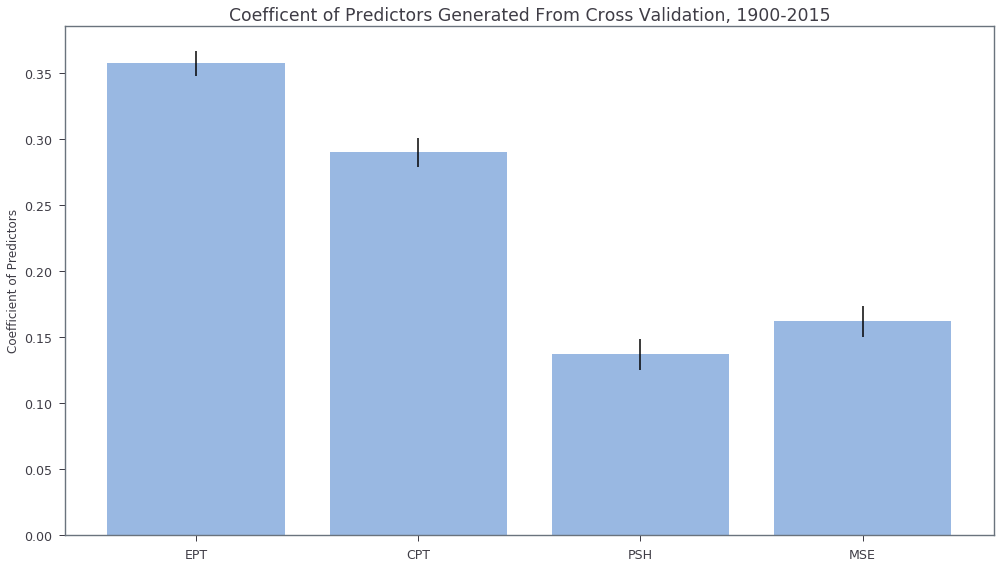

/global/home/users/medhap02/.conda/envs/xarrayenv2/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.


,Standard Deviation,Mean
EPT new,0.009551,0.357306
CPT new,0.010980,0.289782
PSH new,0.011570,0.136764
MSE new,0.011590,0.161672


In [44]:
predictors = ['EPT', 'CPT', 'PSH', 'MSE']
x_pos = np.arange(len(predictors))
CTEs = [EPTregressionmean, CPTregressionmean, PSHregressionmean, MSEregressionmean]
error = [EPTregressionstd, CPTregressionstd, PSHregressionstd, MSEregressionstd]


fig, ax = plt.subplots(figsize=(14,8))
ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Coefficient of Predictors', fontsize = 'large')
ax.set_xticks(x_pos)
ax.set_xticklabels(predictors)
ax.set_title('Coefficent of Predictors Generated From Cross Validation, 1900-2015',fontsize = 'xx-large')

# Save the figure and show
plt.tight_layout()
#plt.savefig('bar_plot_with_error_bars.png')
plt.show()
pd.DataFrame.from_items([('EPT new', EPTmodel), ('CPT new', CPTmodel), ('PSH new', PSHmodel), ('MSE new', MSEmodel)], orient='index', columns=['Standard Deviation', 'Mean'])

# Model

In [45]:
AIRI = 0.357*EPTnew + 0.290*CPTnew + 0.137*PSHnew + 0.162*MSEnew
AIRI

<xarray.DataArray (time: 88)>
array([-1.294683e-01, -6.309214e-01,  2.716958e-01, -1.524958e+00,
       -1.884709e+00,  3.745076e-01, -2.219056e-01,  4.207624e-02,
       -1.049459e-02, -1.128169e+00,  3.047041e-01, -7.316387e-01,
       -2.058961e-01,  5.287019e-01, -4.505425e-01, -2.353695e-01,
       -3.389668e-01, -6.261425e-01, -1.565867e-01,  4.950156e-01,
        1.166686e-02,  4.901143e-01, -2.977269e-02, -4.052447e-01,
        6.005638e-01,  5.352612e-01, -9.860075e-01, -3.006271e-01,
        3.397997e-01,  6.320553e-01, -1.761149e-01,  8.147889e-02,
        1.153303e+00, -5.251276e-01,  4.373133e-01, -3.795903e-01,
        7.377461e-01,  7.305528e-01,  8.139367e-01, -4.984500e-01,
        2.501819e-01, -1.845428e-02,  3.245093e-01,  6.928753e-01,
        1.667112e-01, -5.676993e-01,  1.198640e+00, -9.288486e-01,
       -3.563919e-01, -6.805595e-02, -4.980612e-01,  5.429707e-01,
        7.724013e-01,  8.037254e-01, -3.223665e-01,  6.584946e-01,
       -4.199316e-01,  9.541132e

In [46]:
precip_jjas.time.data = EPTnew.time.data
rainfallmean = precip_jjas.mean()
rainfallstd = precip_jjas.std()

final = (AIRI * rainfallstd) + rainfallmean
print(final)

<xarray.DataArray (time: 88)>
array([713.619369, 681.393066, 739.400519, 623.937054, 600.817366, 746.007805,
       707.678808, 724.643823, 721.265315, 649.437033, 741.521822, 674.920384,
       708.707674, 755.917227, 692.985269, 706.813539, 700.155771, 681.700185,
       711.87658 , 753.752349, 722.689539, 753.437364, 720.026391, 695.896366,
       760.535492, 756.338767, 658.573159, 702.619705, 743.777269, 762.559325,
       710.62159 , 727.176067, 796.057713, 688.191993, 750.044066, 697.545072,
       769.351627, 768.889349, 774.248084, 689.906452, 738.017908, 720.753778,
       742.794623, 766.467971, 732.653596, 685.456088, 798.971339, 662.246522,
       699.035935, 717.566086, 689.93144 , 756.834225, 771.578778, 773.591844,
       701.222602, 764.258467, 694.9525  , 783.256641, 657.362747, 721.84605 ,
       670.410005, 755.44371 , 743.823762, 706.36836 , 668.214001, 755.829392,
       744.06719 , 757.793857, 705.144333, 701.999321, 714.218944, 730.441327,
       719.830677, 610

In [47]:
AIRI2 = 0.475*EPTnew + 0.432*CPTnew + 0.386*PSHnew + 0.301*MSEnew
AIRI2

final2 = (AIRI2 * rainfallstd) + rainfallmean
print(final2)

<xarray.DataArray (time: 88)>
array([690.57453 , 660.88798 , 732.683094, 575.461795, 520.858359, 736.130566,
       667.768053, 726.635315, 716.270435, 597.43996 , 751.556606, 626.504285,
       669.339461, 788.023247, 680.176089, 680.386883, 690.050354, 658.409456,
       706.273767, 772.318687, 703.764276, 786.931531, 719.843007, 678.217905,
       763.808077, 777.583973, 630.029061, 700.258117, 767.926316, 805.338846,
       712.780562, 736.447863, 839.608382, 664.893984, 773.093867, 711.933174,
       811.239479, 784.045126, 783.32249 , 662.3355  , 741.796962, 713.431228,
       739.984756, 798.898229, 733.046089, 653.57938 , 844.23631 , 635.124877,
       695.196632, 706.538172, 678.230534, 786.533178, 811.984048, 807.577955,
       700.447126, 802.275601, 692.758547, 817.560121, 617.037077, 714.383915,
       638.866567, 784.075072, 768.451167, 697.831982, 623.406467, 786.405296,
       756.31046 , 787.398424, 692.480956, 678.878023, 711.930221, 721.734443,
       712.024326, 533

In [48]:
finalcorrelation = correlation(final, precip_jjas, dims='time')
print("multiple linear regression")
print("correlation between final and precipitation", finalcorrelation.data)
print()
finalcorrelation2 = correlation(final2, precip_jjas, dims='time')
print("multiple linear regression")
print("correlation between final and precipitation", finalcorrelation2.data)

multiple linear regression
correlation between final and precipitation 0.6296688799504186

multiple linear regression
correlation between final and precipitation 0.6194283251916524


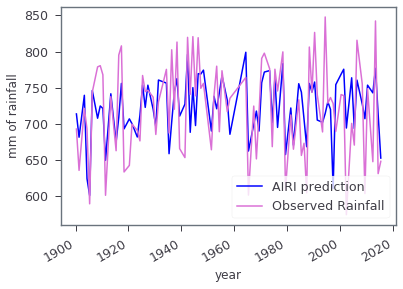

In [49]:
final.plot(label = 'AIRI prediction', color = 'blue')
precip_jjas.plot(label = 'Observed Rainfall', color = 'orchid')
#plt.hlines(precip_jjas.sel(time.year = ('1900-01-01','2015-12-31')).mean(), 1900, 2015, linestyles='dashed',colors='blue')
plt.xlabel('year', fontsize = 'large')
plt.ylabel('mm of rainfall', fontsize = 'large')
plt.legend(loc='lower right')

In [38]:
# Copyright (c) 2020 Medha Palavalli.